1 Realizar un modelo (con data desbalanceada) árbol con las variables predictoras s9 y s4 para
predecir la columna condición
Realizar el plot del árbol (la frontera) :
Profundidad = 4
Indicar el recall 1

2 Realizar un modelo con data balanceada (RUS) y SMOTE utilizar árboles con las mismas
consideraciones del ejercicio anterior:
Indicar si mejora el modelo para el Recall 1

3 (Utilizar isolation - Forest)
Hacer una detección de anomalías utilizando todas las variables predictoras (s1 hasta s21) y
hacer la comparación si existe alguna relación entre las anomalías con la variable condición

Colgarlo en la plataforma virtual:
13:00

# Preguna 1

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings  
warnings.filterwarnings('ignore')

In [88]:
url='/content/drive/MyDrive/PUCP-Catolica-MachineLearning/Examen 2/sensores fecha_hora.xlsx'

In [89]:
train=pd.read_excel(url)

In [90]:
train.head()

,Activo_id,ciclo,fechaHora,s1,s2,s3,s4,s5,s6,s7,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,condicion
0,1,1,2015-01-01 00:00:00,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,...,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190,0
1,1,2,2015-01-01 01:00:00,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,...,2388.07,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236,0
2,1,3,2015-01-01 02:00:00,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,...,2388.03,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442,0
3,1,4,2015-01-01 03:00:00,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,...,2388.08,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739,0
4,1,5,2015-01-01 04:00:00,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,...,2388.04,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044,0


In [91]:
train.sample(25)

,Activo_id,ciclo,fechaHora,s1,s2,s3,s4,s5,s6,s7,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,condicion
3266,16,171,2015-01-08 02:00:00,518.67,643.49,1593.14,1425.53,14.62,21.61,552.16,...,2388.16,8129.52,8.4380,0.03,394,2388,100,38.71,23.1953,0
2987,15,99,2015-01-05 02:00:00,518.67,642.80,1589.94,1402.19,14.62,21.61,554.51,...,2388.05,8141.46,8.4147,0.03,393,2388,100,38.97,23.4945,0
2667,13,122,2015-01-06 01:00:00,518.67,643.01,1596.44,1411.48,14.62,21.61,553.19,...,2388.13,8159.29,8.4330,0.03,395,2388,100,38.73,23.2467,0
3104,16,9,2015-01-01 08:00:00,518.67,642.60,1595.17,1407.39,14.62,21.61,553.39,...,2388.08,8137.09,8.4436,0.03,392,2388,100,38.93,23.3741,0
270,2,79,2015-01-04 06:00:00,518.67,641.62,1585.59,1398.51,14.62,21.61,554.19,...,2388.09,8135.02,8.3931,0.03,390,2388,100,39.15,23.2873,0
579,3,101,2015-01-05 04:00:00,518.67,642.24,1587.77,1405.55,14.62,21.61,554.34,...,2388.07,8146.15,8.4112,0.03,392,2388,100,38.75,23.3883,0
1353,7,50,2015-01-03 01:00:00,518.67,642.41,1590.47,1400.31,14.62,21.61,553.68,...,2387.98,8150.60,8.4159,0.03,393,2388,100,38.86,23.5133,0
1430,7,127,2015-01-06 06:00:00,518.67,642.60,1581.37,1402.39,14.62,21.61,553.71,...,2388.03,8150.03,8.4232,0.03,392,2388,100,39.05,23.4135,0
942,5,96,2015-01-04 23:00:00,518.67,642.62,1580.17,1403.38,14.62,21.61,554.06,...,2387.99,8147.04,8.4102,0.03,391,2388,100,38.91,23.3657,0
2875,14,167,2015-01-07 22:00:00,518.67,643.57,1605.27,1425.50,14.62,21.61,552.38,...,2388.17,8183.20,8.5039,0.03,396,2388,100,38.56,23.0397,1


In [92]:
train.shape

(4168, 25)

In [93]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4168 entries, 0 to 4167
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Activo_id  4168 non-null   int64         
 1   ciclo      4168 non-null   int64         
 2   fechaHora  4168 non-null   datetime64[ns]
 3   s1         4168 non-null   float64       
 4   s2         4168 non-null   float64       
 5   s3         4168 non-null   float64       
 6   s4         4168 non-null   float64       
 7   s5         4168 non-null   float64       
 8   s6         4168 non-null   float64       
 9   s7         4168 non-null   float64       
 10  s8         4168 non-null   float64       
 11  s9         4168 non-null   float64       
 12  s10        4168 non-null   float64       
 13  s11        4168 non-null   float64       
 14  s12        4168 non-null   float64       
 15  s13        4168 non-null   float64       
 16  s14        4168 non-null   float64       


In [94]:
train.isnull().sum()

Activo_id    0
ciclo        0
fechaHora    0
s1           0
s2           0
s3           0
s4           0
s5           0
s6           0
s7           0
s8           0
s9           0
s10          0
s11          0
s12          0
s13          0
s14          0
s15          0
s16          0
s17          0
s18          0
s19          0
s20          0
s21          0
condicion    0
dtype: int64

In [95]:
train.columns

Index(['Activo_id', 'ciclo', 'fechaHora', 's1', 's2', 's3', 's4', 's5', 's6',
       's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16',
       's17', 's18', 's19', 's20', 's21', 'condicion'],
      dtype='object')

<AxesSubplot:xlabel='s9', ylabel='s4'>

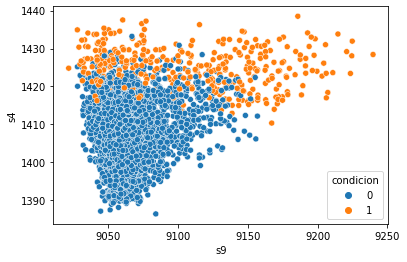

In [96]:
#se selecciona las variables S9 Y S4
sns.scatterplot(data =train, x = 's9', y= 's4', hue='condicion')

In [97]:
train['condicion'].value_counts()

0    3768
1     400
Name: condicion, dtype: int64

In [98]:
fig=px.scatter(train,x = 's9', y= 's4', color='condicion')
fig.show()

**0: Baja probabilidad de falla**

**1: Alta probabilidad de falla**

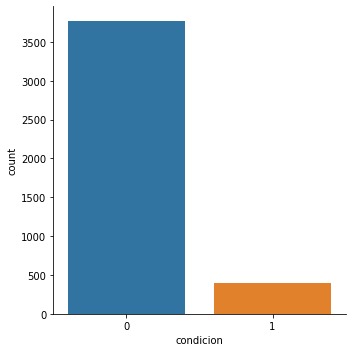

In [99]:
sns.catplot('condicion',data=train,kind='count')
plt.show()

In [100]:
data_seleccionada=['s9','s4']

In [101]:
data_seleccionada

['s9', 's4']

In [102]:
X=train.loc[:,data_seleccionada]
y=train['condicion']

In [103]:
print(X.shape,y.shape)

(4168, 2) (4168,)


In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape,y_test.shape)

(3334, 2) (834, 2) (3334,) (834,)


In [105]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

**Se crea el arbol de clases**

In [106]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=100,max_depth=4)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=100)

In [107]:
#prediccion de nuestros modelos
prediction=model.predict(X_test)

In [108]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       749
           1       0.84      0.64      0.72        85

    accuracy                           0.95       834
   macro avg       0.90      0.81      0.85       834
weighted avg       0.95      0.95      0.95       834



In [109]:
matrix=confusion_matrix(y_test,prediction)
matrix

array([[739,  10],
       [ 31,  54]])

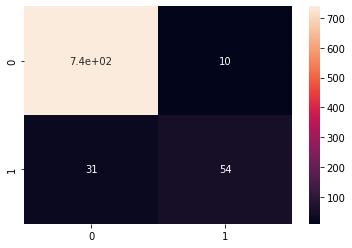

In [110]:
sns.heatmap(matrix, annot=True)
plt.show()

In [111]:
model.score(X_test,y_test)

0.9508393285371702

In [112]:
matrix=confusion_matrix(y_test,prediction,normalize='true')
matrix

array([[0.98664887, 0.01335113],
       [0.36470588, 0.63529412]])

In [113]:
print("El recall es : 63.5 %" )

El recall es : 63.5 %


In [114]:
columna_1=train.columns
columna_1

Index(['Activo_id', 'ciclo', 'fechaHora', 's1', 's2', 's3', 's4', 's5', 's6',
       's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16',
       's17', 's18', 's19', 's20', 's21', 'condicion'],
      dtype='object')

In [115]:
columna_2=train.columns[2:-1]
columna_2

Index(['fechaHora', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9',
       's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19',
       's20', 's21'],
      dtype='object')

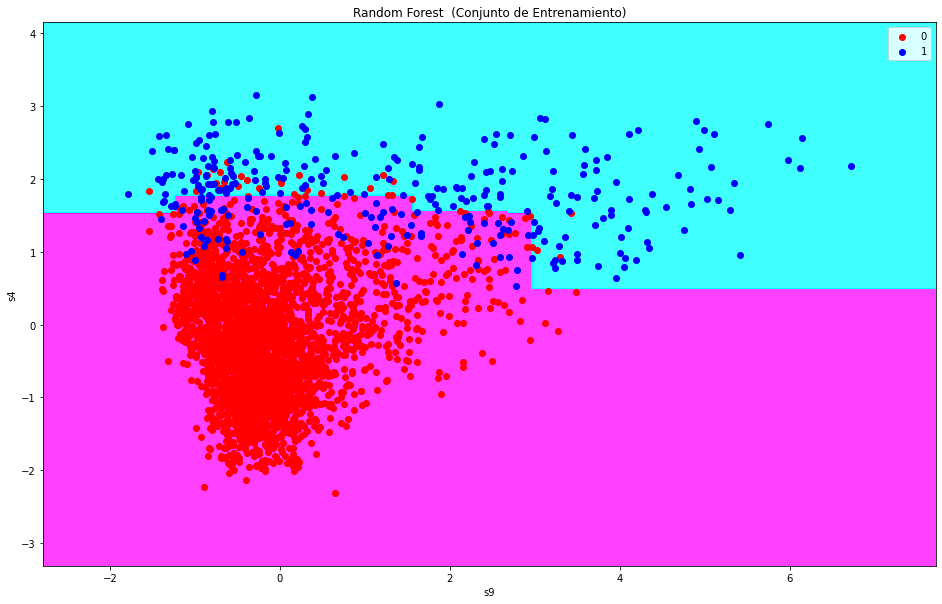

In [116]:
plt.figure(figsize=(16,10))
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'cyan')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())


for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
    
plt.title('Random Forest  (Conjunto de Entrenamiento)')
plt.xlabel('s9')
plt.ylabel('s4')
plt.legend()
plt.show()

# Pregunta 2


## **Balanceo Rust**

In [117]:
train.columns

Index(['Activo_id', 'ciclo', 'fechaHora', 's1', 's2', 's3', 's4', 's5', 's6',
       's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16',
       's17', 's18', 's19', 's20', 's21', 'condicion'],
      dtype='object')

In [118]:
count_clase_0,count_clase_1=train['condicion'].value_counts()
print(count_clase_0,count_clase_1)

3768 400


In [119]:
clase_0=train.loc[train['condicion']==0,['s9','s4','condicion']]
clase_1=train.loc[train['condicion']==1,['s9','s4','condicion']]
print(len(clase_0),len(clase_1))

3768 400


In [120]:
clase_0_rus=clase_0.sample(count_clase_1,replace=True)
len(clase_0_rus)

400

In [121]:
#creamos la tabla de entrenamiento total
df_train=pd.concat([clase_0_rus,clase_1], axis=0)
df_train['condicion'].value_counts()

0    400
1    400
Name: condicion, dtype: int64

In [122]:
df_train.head()

,s9,s4,condicion
2936,9054.29,1395.42,0
3741,9119.80,1417.65,0
1497,9076.56,1405.47,0
868,9071.71,1399.59,0
247,9052.27,1388.97,0


In [123]:
X_train_new=df_train.iloc[:, :-1]
y_train_new=df_train.iloc[:,-1]
print(len(X_train_new))
print(len(y_train_new))

800
800


In [124]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_new=scaler.fit_transform(X_train_new)

In [125]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=100,max_depth=4)
model.fit(X_train_new,y_train_new)

DecisionTreeClassifier(max_depth=4, random_state=100)

In [126]:
#prediccion de nuestros modelos
prediction_1=model.predict(X_test)

In [127]:
matrix_1 = confusion_matrix(y_test,prediction_1)
matrix_1

array([[488, 261],
       [  0,  85]])

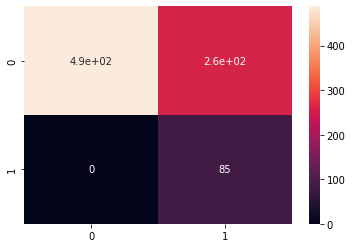

In [128]:
sns.heatmap(matrix_1, annot=True)
plt.show()

In [129]:
matrix_1_ = confusion_matrix(y_test,prediction_1,normalize='true')
matrix_1_

array([[0.65153538, 0.34846462],
       [0.        , 1.        ]])

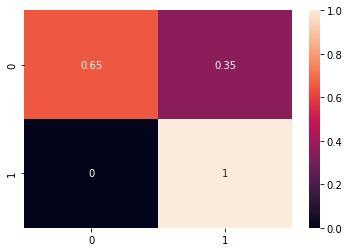

In [130]:
sns.heatmap(matrix_1_, annot=True)
plt.show()

In [131]:
print('Si el modelo balanceado mejora el recall de 63.5 % a 100 %')

Si el modelo balanceado mejora el recall de 63.5 % a 100 %


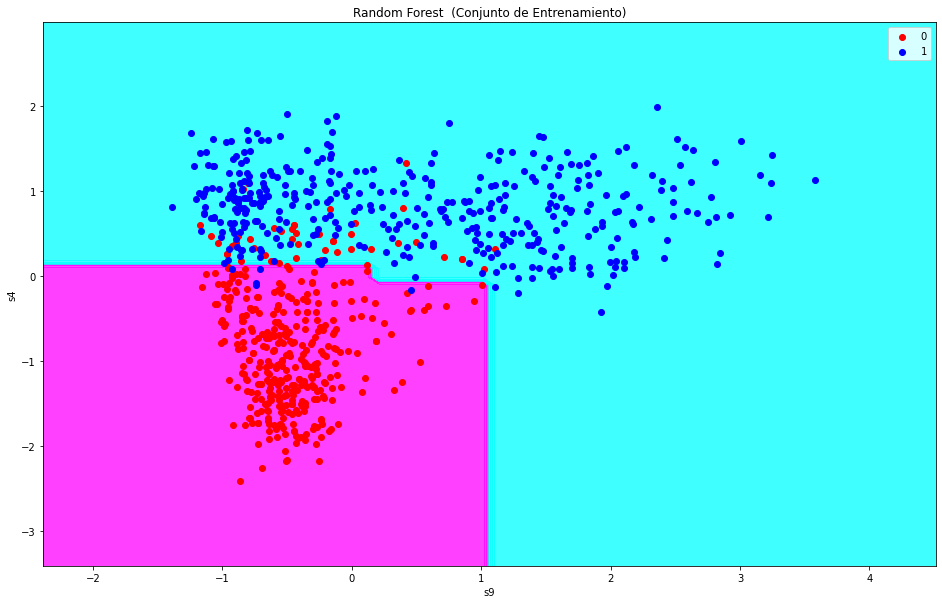

In [132]:
# Representación gráfica de los resultados del algoritmo en el Conjunto de Entrenamiento
plt.figure(figsize=(16,10))
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_new, y_train_new
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.1),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.1))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'cyan')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('Random Forest  (Conjunto de Entrenamiento)')
plt.xlabel('s9')
plt.ylabel('s4')
plt.legend()
plt.show()

## SMOTE

In [133]:
#crear una libreria smote
from imblearn.over_sampling import SMOTE

In [134]:
train.head()

,Activo_id,ciclo,fechaHora,s1,s2,s3,s4,s5,s6,s7,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,condicion
0,1,1,2015-01-01 00:00:00,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,...,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190,0
1,1,2,2015-01-01 01:00:00,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,...,2388.07,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236,0
2,1,3,2015-01-01 02:00:00,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,...,2388.03,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442,0
3,1,4,2015-01-01 03:00:00,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,...,2388.08,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739,0
4,1,5,2015-01-01 04:00:00,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,...,2388.04,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044,0


In [135]:
#dataframe.loc[filas, columnas]
X=train.loc[:,['s9','s4']]
y=train['condicion']

In [136]:
#smote
smote=SMOTE(sampling_strategy='minority')
X_smote,y_smote=smote.fit_resample(X,y)

In [137]:
X_smote.head()

,s9,s4
0,9046.19,1400.60
1,9044.07,1403.14
2,9052.94,1404.20
3,9049.48,1401.87
4,9055.15,1406.22


In [138]:
train_X_smote=pd.DataFrame(data=X_smote,columns = X.columns)
train_y_smote=pd.DataFrame(data=y_smote,columns=['condicion'])

In [139]:
#concatenamos la data
train_smote=pd.concat([train_X_smote,train_y_smote],axis=1)
train_smote.head()

,s9,s4,condicion
0,9046.19,1400.60,0
1,9044.07,1403.14,0
2,9052.94,1404.20,0
3,9049.48,1401.87,0
4,9055.15,1406.22,0


In [140]:
train_smote['condicion'].value_counts()

0    3768
1    3768
Name: condicion, dtype: int64

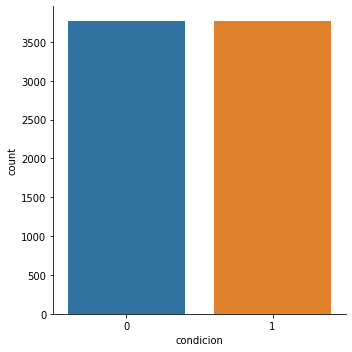

In [141]:
sns.catplot('condicion',data=train_smote,kind='count')
plt.show()

In [142]:
X_new2=train_smote.iloc[:,:-1]
y_new2=train_smote.iloc[:,-1]

In [143]:
X_train,X_test,y_train,y_test=train_test_split(X_new2,y_new2,test_size=0.2,random_state=100)

In [144]:
#Escalamiento
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [145]:
tree_balance = DecisionTreeClassifier(max_depth=4,random_state=100)
tree_model_balance = tree_balance.fit(X_train, y_train)

In [146]:
prediction_2=tree_model_balance.predict(X_test)

In [147]:
print(classification_report(y_test,prediction_2))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94       772
           1       0.90      0.99      0.94       736

    accuracy                           0.94      1508
   macro avg       0.94      0.94      0.94      1508
weighted avg       0.95      0.94      0.94      1508



In [148]:
tree_model_balance.score(X_test,y_test)

0.9416445623342176

In [149]:
matrix=confusion_matrix(y_test,prediction_2)
print(matrix)

[[692  80]
 [  8 728]]


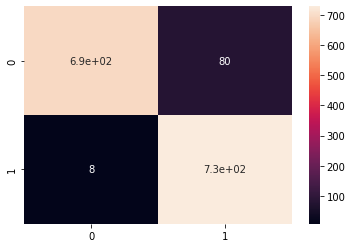

In [150]:
sns.heatmap(matrix,annot=True)
plt.show()

In [151]:
matrix=confusion_matrix(y_test,prediction_2,normalize='true')
print(matrix)

[[0.89637306 0.10362694]
 [0.01086957 0.98913043]]


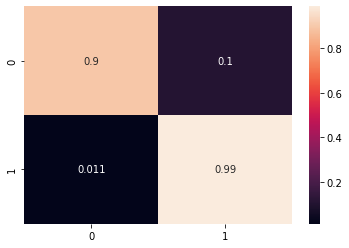

In [152]:
sns.heatmap(matrix,annot=True)
plt.show()

In [153]:
print('Si el modelo balanceado mejora el recall de 63.5 % a 99.32 %')

Si el modelo balanceado mejora el recall de 63.5 % a 99.32 %


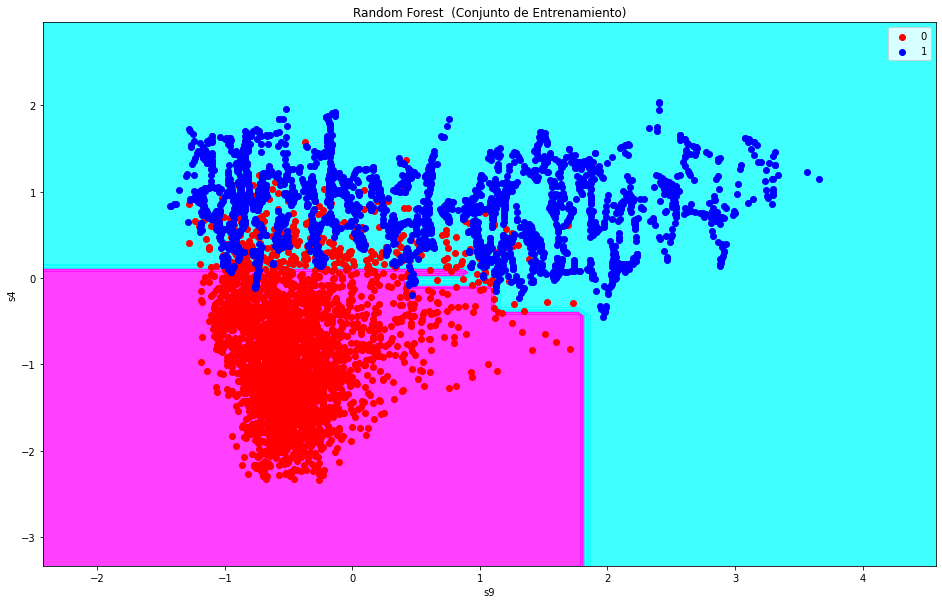

In [154]:
plt.figure(figsize=(16,10))
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.1),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.1))
plt.contourf(X1, X2, tree_model_balance.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'cyan')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('Random Forest  (Conjunto de Entrenamiento)')
plt.xlabel('s9')
plt.ylabel('s4')
plt.legend()


plt.show()

# Pregunta 3

In [155]:
train.head()

,Activo_id,ciclo,fechaHora,s1,s2,s3,s4,s5,s6,s7,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,condicion
0,1,1,2015-01-01 00:00:00,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,...,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190,0
1,1,2,2015-01-01 01:00:00,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,...,2388.07,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236,0
2,1,3,2015-01-01 02:00:00,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,...,2388.03,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442,0
3,1,4,2015-01-01 03:00:00,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,...,2388.08,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739,0
4,1,5,2015-01-01 04:00:00,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,...,2388.04,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044,0


In [156]:
train['condicion'].value_counts()

0    3768
1     400
Name: condicion, dtype: int64

In [157]:
features=train.iloc[:,3:-1]
features.head()

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190
1,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236
2,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442
3,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739
4,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044


In [158]:
features.isnull().sum()

s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
s7     0
s8     0
s9     0
s10    0
s11    0
s12    0
s13    0
s14    0
s15    0
s16    0
s17    0
s18    0
s19    0
s20    0
s21    0
dtype: int64

In [159]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4168 entries, 0 to 4167
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   s1      4168 non-null   float64
 1   s2      4168 non-null   float64
 2   s3      4168 non-null   float64
 3   s4      4168 non-null   float64
 4   s5      4168 non-null   float64
 5   s6      4168 non-null   float64
 6   s7      4168 non-null   float64
 7   s8      4168 non-null   float64
 8   s9      4168 non-null   float64
 9   s10     4168 non-null   float64
 10  s11     4168 non-null   float64
 11  s12     4168 non-null   float64
 12  s13     4168 non-null   float64
 13  s14     4168 non-null   float64
 14  s15     4168 non-null   float64
 15  s16     4168 non-null   float64
 16  s17     4168 non-null   int64  
 17  s18     4168 non-null   int64  
 18  s19     4168 non-null   int64  
 19  s20     4168 non-null   float64
 20  s21     4168 non-null   float64
dtypes: float64(18), int64(3)
memory usage

In [160]:
features.fillna(0,inplace=True)
features.shape

(4168, 21)

In [161]:
columnas=features.columns

In [162]:
columnas

Index(['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11',
       's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21'],
      dtype='object')

In [163]:
# contaminación % de anomalías
from sklearn.ensemble import IsolationForest
contaminacion = 0.20

In [164]:
clf = IsolationForest(n_estimators = 100, max_samples='auto'
                    , bootstrap = False, n_jobs=-1
                    , random_state=100, verbose=0
                    ,contamination = contaminacion)

In [165]:
clf.fit(features[columnas])

IsolationForest(contamination=0.2, n_jobs=-1, random_state=100)

In [166]:
prediction_3=clf.predict(features[columnas])

In [167]:
features['anomaly']=prediction_3
features.head()

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,anomaly
0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,...,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190,1
1,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,...,2388.07,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236,1
2,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,...,2388.03,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442,1
3,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,...,2388.08,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739,1
4,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,...,2388.04,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044,1


In [168]:
train['anomaly']=prediction_3
train.sample(20)

,Activo_id,ciclo,fechaHora,s1,s2,s3,s4,s5,s6,s7,...,s14,s15,s16,s17,s18,s19,s20,s21,condicion,anomaly
118,1,119,2015-01-05 22:00:00,518.67,642.67,1596.80,1404.46,14.62,21.61,553.77,...,8123.85,8.4194,0.03,394,2388,100,39.01,23.3188,0,1
3598,18,18,2015-01-01 17:00:00,518.67,642.14,1583.75,1397.20,14.62,21.61,554.01,...,8144.62,8.3987,0.03,392,2388,100,38.77,23.3747,0,1
2701,13,156,2015-01-07 11:00:00,518.67,643.71,1599.54,1419.52,14.62,21.61,552.08,...,8205.99,8.4988,0.03,395,2388,100,38.48,23.0585,1,-1
2797,14,89,2015-01-04 16:00:00,518.67,642.56,1592.14,1407.39,14.62,21.61,552.69,...,8142.94,8.4386,0.03,393,2388,100,38.79,23.2488,0,1
2101,10,188,2015-01-08 19:00:00,518.67,642.95,1590.16,1415.61,14.62,21.61,553.15,...,8155.74,8.4842,0.03,395,2388,100,38.71,23.2227,0,1
2315,11,180,2015-01-08 11:00:00,518.67,642.91,1587.71,1407.66,14.62,21.61,553.23,...,8158.23,8.4323,0.03,393,2388,100,38.67,23.2629,0,1
3082,15,194,2015-01-09 01:00:00,518.67,643.24,1606.09,1425.55,14.62,21.61,551.95,...,8127.43,8.5292,0.03,395,2388,100,38.71,23.2484,1,-1
3904,19,129,2015-01-06 08:00:00,518.67,643.44,1589.42,1420.91,14.62,21.61,552.27,...,8123.83,8.4572,0.03,394,2388,100,38.51,23.2079,0,1
3219,16,124,2015-01-06 03:00:00,518.67,643.44,1589.60,1420.38,14.62,21.61,552.86,...,8138.10,8.4610,0.03,394,2388,100,38.73,23.1425,0,1
2067,10,154,2015-01-07 09:00:00,518.67,642.02,1581.45,1402.71,14.62,21.61,554.41,...,8146.31,8.4130,0.03,391,2388,100,38.94,23.2698,0,1


In [169]:
train_new=train.to_csv("tabla1.csv", index=False)

In [171]:
import duckdb
duckdb.read_csv('tabla1.csv') 

┌───────────┬───────┬─────────────────────┬────────┬────────┬───┬───────┬────────┬─────────┬───────────┬─────────┐
│ Activo_id │ ciclo │      fechaHora      │   s1   │   s2   │ … │  s19  │  s20   │   s21   │ condicion │ anomaly │
│   int64   │ int64 │      timestamp      │ double │ double │   │ int64 │ double │ double  │   int64   │  int64  │
├───────────┼───────┼─────────────────────┼────────┼────────┼───┼───────┼────────┼─────────┼───────────┼─────────┤
│         1 │     1 │ 2015-01-01 00:00:00 │ 518.67 │ 641.82 │ … │   100 │  39.06 │  23.419 │         0 │       1 │
│         1 │     2 │ 2015-01-01 01:00:00 │ 518.67 │ 642.15 │ … │   100 │   39.0 │ 23.4236 │         0 │       1 │
│         1 │     3 │ 2015-01-01 02:00:00 │ 518.67 │ 642.35 │ … │   100 │  38.95 │ 23.3442 │         0 │       1 │
│         1 │     4 │ 2015-01-01 03:00:00 │ 518.67 │ 642.35 │ … │   100 │  38.88 │ 23.3739 │         0 │       1 │
│         1 │     5 │ 2015-01-01 04:00:00 │ 518.67 │ 642.37 │ … │   100 │   38.9

In [172]:
duckdb.sql('SELECT * FROM "tabla1.csv" where anomaly = 1') 

┌───────────┬───────┬─────────────────────┬────────┬────────┬───┬───────┬────────┬─────────┬───────────┬─────────┐
│ Activo_id │ ciclo │      fechaHora      │   s1   │   s2   │ … │  s19  │  s20   │   s21   │ condicion │ anomaly │
│   int64   │ int64 │      timestamp      │ double │ double │   │ int64 │ double │ double  │   int64   │  int64  │
├───────────┼───────┼─────────────────────┼────────┼────────┼───┼───────┼────────┼─────────┼───────────┼─────────┤
│         1 │     1 │ 2015-01-01 00:00:00 │ 518.67 │ 641.82 │ … │   100 │  39.06 │  23.419 │         0 │       1 │
│         1 │     2 │ 2015-01-01 01:00:00 │ 518.67 │ 642.15 │ … │   100 │   39.0 │ 23.4236 │         0 │       1 │
│         1 │     3 │ 2015-01-01 02:00:00 │ 518.67 │ 642.35 │ … │   100 │  38.95 │ 23.3442 │         0 │       1 │
│         1 │     4 │ 2015-01-01 03:00:00 │ 518.67 │ 642.35 │ … │   100 │  38.88 │ 23.3739 │         0 │       1 │
│         1 │     5 │ 2015-01-01 04:00:00 │ 518.67 │ 642.37 │ … │   100 │   38.9

In [173]:
outliers = features.loc[train['anomaly']== -1]
outlier_index = list(outliers.index)

In [174]:
print(outlier_index)

[155, 159, 162, 165, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 194, 195, 196, 197, 200, 201, 207, 208, 212, 217, 219, 223, 225, 226, 233, 240, 243, 246, 248, 256, 265, 266, 276, 279, 283, 293, 319, 320, 325, 331, 345, 383, 440, 450, 451, 452, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 520, 551, 572, 587, 629, 630, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 703, 807, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 850, 851, 853, 856, 858, 859, 862, 867, 869, 872, 873, 875, 876, 878, 880, 885, 887, 893, 894, 897, 898, 905, 911, 913, 914, 916, 917, 931, 932, 933, 946, 961, 1016, 1027, 1035, 1061, 1062, 1069, 1078, 1079, 1080, 1083, 1084, 1086, 1087, 1088, 

In [175]:
train.query("anomaly==-1")

,Activo_id,ciclo,fechaHora,s1,s2,s3,s4,s5,s6,s7,...,s14,s15,s16,s17,s18,s19,s20,s21,condicion,anomaly
155,1,156,2015-01-07 11:00:00,518.67,643.04,1585.61,1421.23,14.62,21.61,553.24,...,8128.48,8.4432,0.03,395,2388,100,38.77,23.2791,0,-1
159,1,160,2015-01-07 15:00:00,518.67,643.45,1590.65,1418.08,14.62,21.61,551.87,...,8122.68,8.4433,0.03,396,2388,100,38.52,23.2817,0,-1
162,1,163,2015-01-07 18:00:00,518.67,642.85,1600.54,1421.09,14.62,21.61,552.41,...,8124.06,8.5129,0.03,393,2388,100,38.65,23.1419,0,-1
165,1,166,2015-01-07 21:00:00,518.67,643.34,1596.72,1422.37,14.62,21.61,552.13,...,8119.14,8.4663,0.03,395,2388,100,38.62,23.1450,0,-1
170,1,171,2015-01-08 02:00:00,518.67,643.26,1592.06,1414.99,14.62,21.61,552.71,...,8124.87,8.4922,0.03,395,2388,100,38.68,23.2444,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4163,20,230,2015-01-10 13:00:00,518.67,643.57,1605.67,1431.45,14.62,21.61,552.20,...,8144.08,8.4887,0.03,396,2388,100,38.60,23.1231,1,-1
4164,20,231,2015-01-10 14:00:00,518.67,643.89,1603.35,1429.72,14.62,21.61,550.84,...,8146.48,8.4800,0.03,397,2388,100,38.74,22.9885,1,-1
4165,20,232,2015-01-10 15:00:00,518.67,643.85,1608.02,1432.08,14.62,21.61,551.34,...,8139.51,8.5230,0.03,397,2388,100,38.33,23.1460,1,-1
4166,20,233,2015-01-10 16:00:00,518.67,643.93,1601.90,1437.23,14.62,21.61,551.67,...,8143.94,8.5058,0.03,396,2388,100,38.46,22.9783,1,-1


In [179]:
train.sample(50)

,Activo_id,ciclo,fechaHora,s1,s2,s3,s4,s5,s6,s7,...,s14,s15,s16,s17,s18,s19,s20,s21,condicion,anomaly
3143,16,48,2015-01-02 23:00:00,518.67,642.81,1585.74,1412.69,14.62,21.61,553.58,...,8137.10,8.4429,0.03,392,2388,100,38.66,23.1808,0,1
3950,20,17,2015-01-01 16:00:00,518.67,642.52,1588.52,1405.10,14.62,21.61,552.78,...,8139.99,8.4460,0.03,391,2388,100,38.78,23.2310,0,1
3072,15,184,2015-01-08 15:00:00,518.67,643.18,1590.86,1423.28,14.62,21.61,552.36,...,8128.79,8.4563,0.03,395,2388,100,38.70,23.1749,0,1
3496,17,192,2015-01-08 23:00:00,518.67,642.55,1586.71,1409.87,14.62,21.60,554.54,...,8167.63,8.4493,0.03,395,2388,100,39.06,23.3430,0,-1
3337,17,33,2015-01-02 08:00:00,518.67,641.87,1586.14,1402.83,14.62,21.61,554.47,...,8139.61,8.3967,0.03,391,2388,100,38.98,23.3996,0,1
543,3,65,2015-01-03 16:00:00,518.67,641.69,1586.21,1400.69,14.62,21.61,554.63,...,8139.64,8.4379,0.03,392,2388,100,39.12,23.4958,0,1
2669,13,124,2015-01-06 03:00:00,518.67,642.76,1595.96,1418.67,14.62,21.61,551.91,...,8163.54,8.4446,0.03,395,2388,100,38.68,23.2281,0,1
334,2,143,2015-01-06 22:00:00,518.67,642.31,1588.88,1400.49,14.62,21.61,554.05,...,8138.17,8.4230,0.03,393,2388,100,38.82,23.4197,0,1
1858,9,146,2015-01-07 01:00:00,518.67,642.96,1582.97,1405.57,14.62,21.61,553.96,...,8173.26,8.4380,0.03,392,2388,100,38.91,23.3391,0,1
1034,5,188,2015-01-08 19:00:00,518.67,642.91,1587.14,1406.65,14.62,21.61,553.35,...,8159.18,8.4366,0.03,393,2388,100,38.87,23.2728,0,1


In [180]:
train.isnull().sum()

Activo_id    0
ciclo        0
fechaHora    0
s1           0
s2           0
s3           0
s4           0
s5           0
s6           0
s7           0
s8           0
s9           0
s10          0
s11          0
s12          0
s13          0
s14          0
s15          0
s16          0
s17          0
s18          0
s19          0
s20          0
s21          0
condicion    0
anomaly      0
dtype: int64

In [176]:
train['anomaly'].value_counts()

 1    3334
-1     834
Name: anomaly, dtype: int64

In [184]:
features['anomaly'].value_counts()

 1    3334
-1     834
Name: anomaly, dtype: int64

In [182]:
features.head()

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,anomaly
0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,...,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190,1
1,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,...,2388.07,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236,1
2,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,...,2388.03,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442,1
3,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,...,2388.08,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739,1
4,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,...,2388.04,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044,1


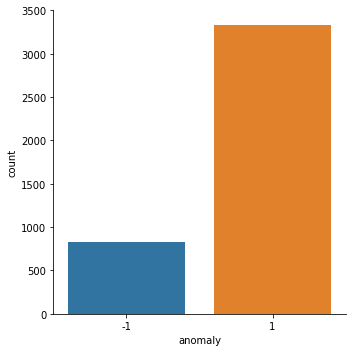

In [183]:
sns.catplot('anomaly',data=features,kind='count')
plt.show()

In [178]:
834/(len(train))

0.20009596928982726

# PCA 

In [181]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components = 3)  
scaler = StandardScaler()

In [185]:
X = scaler.fit_transform(features[columnas])
X_reduce = pca.fit_transform(X)

In [186]:
X_reduce

array([[-2.51852454, -0.54098503, -0.32519582],
       [-1.95356432, -0.83094239, -0.27935785],
       [-2.55368152, -0.65514687, -0.3123572 ],
       ...,
       [ 8.29053502, -0.97536867,  0.46792609],
       [ 7.63335185, -0.61913455,  0.40824704],
       [ 7.66479751, -0.99976619,  0.39533015]])

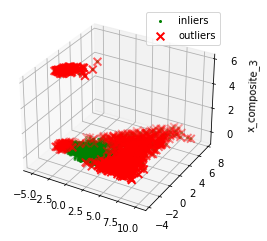

In [187]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")

# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")

# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()

In [188]:
pca = PCA(n_components=2)  # Reduce to k=3 dimensions
scaler = StandardScaler()
#normalize the metrics
X = scaler.fit_transform(features[columnas])
X_reduce = pca.fit_transform(X)

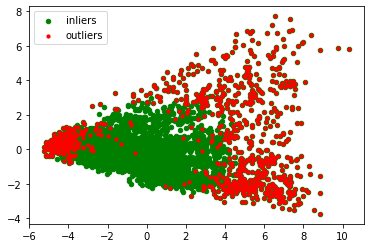

In [189]:
fig = plt.figure()

plt.scatter(X_reduce[:, 0], X_reduce[:, 1],s=20, lw=1, label="inliers",c="green")

# Plot x's for the ground truth outliers
plt.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1],  lw=2, s=20, marker=".", c="red", label="outliers")
plt.legend()

plt.show()